In [10]:
import csv
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt 

import landmarks_utils
import dataset_utils
import process_heartrate as utils
from importlib import reload

video_dir = "dataset/videos/"
csv_path = "dataset/dataset.csv"
landmarks_path = "dataset/outputs/landmarks/"
datastreams_path = "dataset/outputs/datastreams/"
frames_path = "dataset/outputs/frames/"

test_filename = "22.mov"
test_id = 22
test_str = "22"

In [5]:
#load video
frames, fps, video = landmarks_utils.load_video(video_dir + test_filename, output_size=(480, 270))
video

Video dataset/videos/22.mov loaded: 315 frames with shape (270, 480, 3)


In [8]:
#find landmarks
curr_landmark_path = landmarks_path+test_str+'.json'
if not os.path.exists(curr_landmark_path):
    landmarks_utils.fa_video_pred(frames, curr_landmark_path)
video_preds = landmarks_utils.load_landmarks(curr_landmark_path)

In [11]:
signal_1d = np.load(datastreams_path+test_str+"/signal_1D.npy")
signal_3d = np.load(datastreams_path+test_str+"/signal_3D.npy")

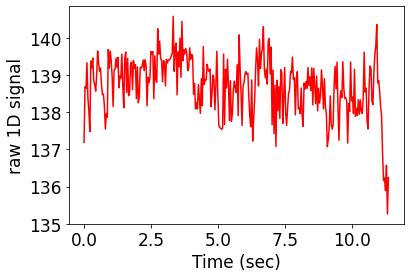

In [12]:
utils.plotSignals_1D(signal_1d, fps, "raw 1D signal")

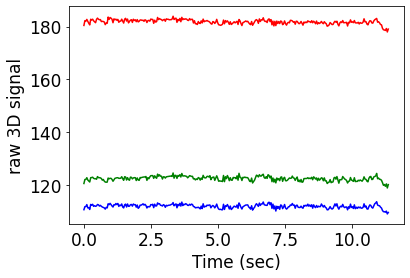

In [13]:
utils.plotSignals_3D(signal_3d, fps, "raw 3D signal")

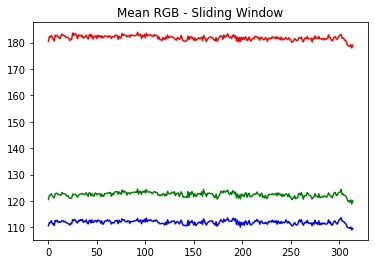

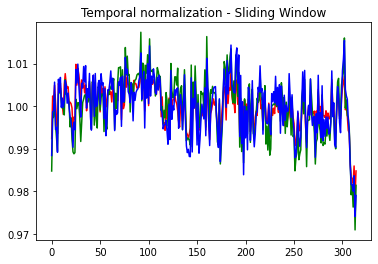

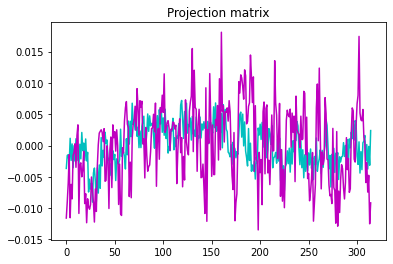

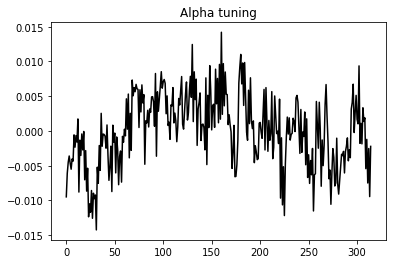

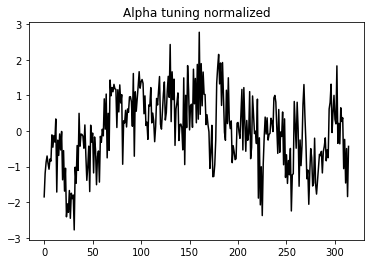

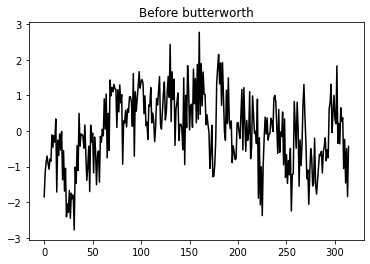

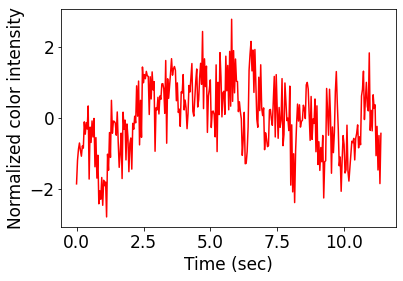

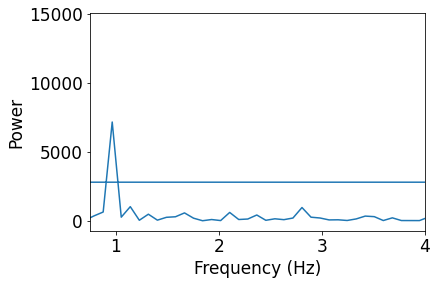

In [14]:
hr_pos, bvp_filtered = utils.process_pos(signal_3d, fps, filter=False, plot=True)

In [16]:
hr_pos * 60

57.89473684210526

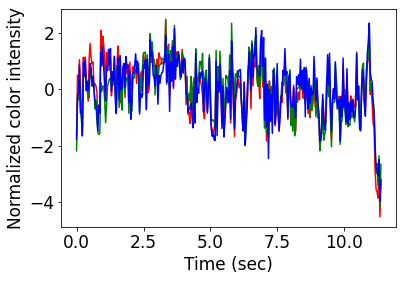

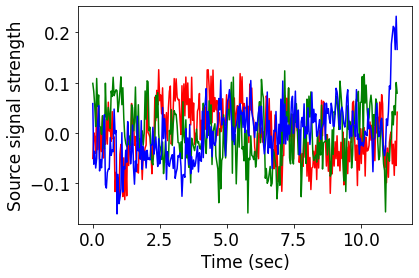

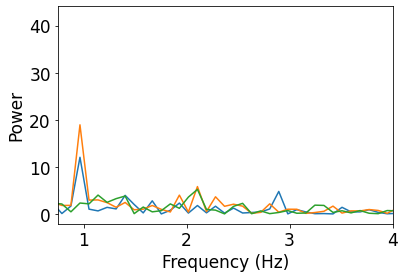

In [18]:
hr_ica = utils.process_ica(signal_3d, fps, filter=False, plot=True)

In [20]:
hr_ica * 60

57.89473684210526

In [ ]:
hr_ica = utils.process_ica(signal_3d, fps, filter=False, plot=True)